In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("C:/Users/HP/Downloads/archive/Pune_rent.csv")
df1.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2


In [4]:
df1.isnull().sum()
df1 = df1.dropna()

In [5]:
df1.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
dtype: int64

In [6]:
df1.duplicated().sum()
df1 = df1.drop_duplicates()

In [7]:
df1.duplicated().sum()

0

In [8]:
df1 = df1.drop(['property_type','furnish_type','seller_type','bathroom'],axis='columns')
df1.head()

,bedroom,layout_type,locality,price,area
0,1,BHK,Mundhwa,"6,750",450
1,2,BHK,Wakad,"18,000",916
2,3,BHK,Wagholi,"16,500",1085
3,1,RK,Kothrud,"8,000",250
4,2,BHK,Yerawada,"25,000",1005


In [9]:
df1.layout_type.unique()

array(['BHK', 'RK'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_en = LabelEncoder()

In [12]:
df1['layout_type'] = label_en.fit_transform(df1['layout_type'])
df1.head()

,bedroom,layout_type,locality,price,area
0,1,0,Mundhwa,"6,750",450
1,2,0,Wakad,"18,000",916
2,3,0,Wagholi,"16,500",1085
3,1,1,Kothrud,"8,000",250
4,2,0,Yerawada,"25,000",1005


In [13]:
df1.corr()

,bedroom,layout_type,area
bedroom,1.000000,-0.253012,0.805646
layout_type,-0.253012,1.000000,-0.233800
area,0.805646,-0.233800,1.000000


In [14]:
df1.price.unique()

array(['6,750', '18,000', '16,500', '8,000', '25,000', '11,000', '17,000',
       '13,500', '3,500', '12,000', '6,500', '20,000', '9,500', '45,000',
       '35,000', '7,500', '30,000', '15,000', '14,000', '9,000', '13,000',
       '4,000', '24,000', '17,400', '18,500', '6,800', '10,000', '4,500',
       '8,100', '19,000', '6,000', '12,500', '16,000', '14,500', '21,000',
       '17,500', '31,000', '7,000', '8,500', '27,000', '10,500', '50,000',
       '2,000', '14,650', '15,650', '22,000', '32,000', '1.8', '23,000',
       '4,999', '29,000', '3,800', '5,000', '12,400', '5,200', '22,250',
       '11,500', '5,500', '17,900', '74,000', '26,500', '69,000',
       '54,000', '23,500', '39,000', '34,000', '26,000', '35,500',
       '33,000', '64,000', '22,500', '19,250', '28,000', '40,000',
       '42,000', '1', '36,000', '55,000', '68,000', '15,500', '20,500',
       '38,000', '15,999', '44,000', '1.79', '1.14', '21,500', '41,000',
       '12,750', '12,600', '10,750', '14,850', '14,800', '11,

In [15]:
def changeprice(price):
    if(',' in price):
        return int("".join(price.split(',')))
    else:
        return int("".join(price.split('.')))

In [16]:
changeprice('25.000')

25000

In [17]:
df1['new_price'] = df1['price'].apply(changeprice)

In [18]:
df1.head()

,bedroom,layout_type,locality,price,area,new_price
0,1,0,Mundhwa,"6,750",450,6750
1,2,0,Wakad,"18,000",916,18000
2,3,0,Wagholi,"16,500",1085,16500
3,1,1,Kothrud,"8,000",250,8000
4,2,0,Yerawada,"25,000",1005,25000


In [19]:
df1.corr()

,bedroom,layout_type,area,new_price
bedroom,1.000000,-0.253012,0.805646,0.602054
layout_type,-0.253012,1.000000,-0.233800,-0.216213
area,0.805646,-0.233800,1.000000,0.554281
new_price,0.602054,-0.216213,0.554281,1.000000


In [20]:
df1[df1['area']/df1['bedroom']<300]

,bedroom,layout_type,locality,price,area,new_price
3,1,1,Kothrud,"8,000",250,8000
8,1,1,Dhanori,"3,500",200,3500
80,1,1,Pimpri,"8,500",270,8500
118,1,1,Katraj,"2,000",200,2000
423,1,1,Hadapsar,"6,000",220,6000
...,...,...,...,...,...,...
22213,1,1,Chakan,"4,000",258,4000
22390,1,1,New Sangavi,"5,500",250,5500
22426,1,1,Gokhalenagar,"16,000",250,16000
22542,4,0,Koregaon Park,1.5,1100,15


In [21]:
df2 = df1[~(df1['area']/df1['bedroom']<300)]

In [22]:
df2.head()

,bedroom,layout_type,locality,price,area,new_price
0,1,0,Mundhwa,"6,750",450,6750
1,2,0,Wakad,"18,000",916,18000
2,3,0,Wagholi,"16,500",1085,16500
4,2,0,Yerawada,"25,000",1005,25000
5,1,0,Ganj Peth,"11,000",600,11000


In [23]:
df2['new_price'].describe()

count    14280.000000
mean     18924.784104
std      11729.189757
min          1.000000
25%      12000.000000
50%      16000.000000
75%      23000.000000
max      99000.000000
Name: new_price, dtype: float64

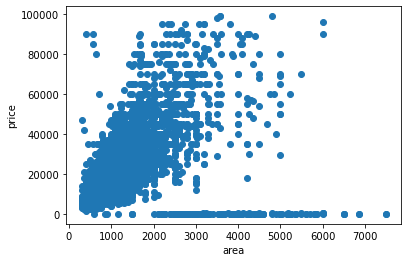

In [24]:
plt.scatter(df2['area'],df2['new_price'])
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [25]:
#df2[df2['new_price']<200]
df2[df2.area==300].min()

bedroom              1
layout_type          0
locality       Bopkhel
price           12,000
area               300
new_price         3000
dtype: object

In [26]:
df3 = df2[~(df2.new_price<3000)]

In [27]:
df3

,bedroom,layout_type,locality,price,area,new_price
0,1,0,Mundhwa,"6,750",450,6750
1,2,0,Wakad,"18,000",916,18000
2,3,0,Wagholi,"16,500",1085,16500
4,2,0,Yerawada,"25,000",1005,25000
5,1,0,Ganj Peth,"11,000",600,11000
...,...,...,...,...,...,...
22795,1,0,Chinchwad,"13,250",650,13250
22796,1,1,Wadgaon Sheri,"7,000",350,7000
22797,1,0,Kothrud,"8,500",389,8500
22798,1,0,Wakad,"16,500",670,16500


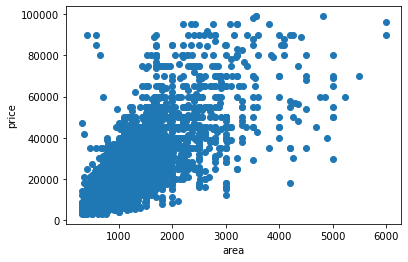

In [28]:
plt.scatter(df3['area'],df3['new_price'])
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [29]:
df3.corr()

,bedroom,layout_type,area,new_price
bedroom,1.000000,-0.243163,0.824098,0.689919
layout_type,-0.243163,1.000000,-0.239858,-0.206515
area,0.824098,-0.239858,1.000000,0.770031
new_price,0.689919,-0.206515,0.770031,1.000000


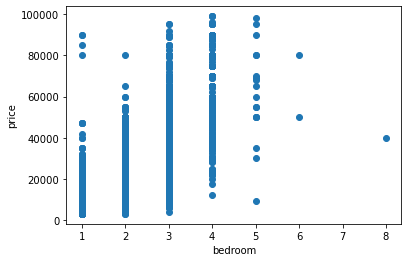

In [30]:
plt.scatter(df3['bedroom'],df3['new_price'])
plt.xlabel('bedroom')
plt.ylabel('price')
plt.show()

In [31]:
df3 = df3[~(df3['bedroom'] == 8)]

In [32]:
df3[df3.new_price==99000]

,bedroom,layout_type,locality,price,area,new_price
3219,4,0,New Kalyani Nagar,"99,000",3562,99000
3260,4,0,Kalyani Nagar,"99,000",4812,99000
3365,4,0,New Kalyani Nagar,"99,000",3562,99000


In [33]:
df3.duplicated().sum()

1249

In [34]:
df3 = df3.drop_duplicates()

In [35]:
df3.duplicated().sum()

0

In [36]:
df3.corr()

,bedroom,layout_type,area,new_price
bedroom,1.000000,-0.246952,0.820981,0.690467
layout_type,-0.246952,1.000000,-0.239837,-0.207619
area,0.820981,-0.239837,1.000000,0.768603
new_price,0.690467,-0.207619,0.768603,1.000000


In [37]:
df3.locality.unique()

array(['Mundhwa', 'Wakad', 'Wagholi', 'Yerawada', 'Ganj Peth',
       'Pimple Saudagar', 'Hinjewadi', 'Nigdi', 'Bopkhel', 'Viman Nagar',
       'Dhayari', 'Chakan', 'Chinchwad', 'Kharadi', 'Kalyani Nagar',
       'Ravet', 'Kothrud', 'Lohegaon', 'Parvati Darshan', 'Chikhali',
       'Baner', 'Pimple Gurav', 'Bhosari', 'Undri', 'Dighi', 'Sus',
       'Hadapsar', 'Sinhgad Road', 'Dhanori', 'Tathawade', 'Ambegaon 1',
       'Karve Nagar', 'Bavdhan', 'Warje', 'Kondhwa', 'Manjari', 'Daund',
       'Manjari Budruk', 'Wadegaon', 'New Sangavi', 'Alandi', 'Gahunje',
       'Wadgaon Sheri', 'Sopan Baug', 'Pimple Nilakh', 'Bhawani Peth',
       'Anand Nagar', 'Siddharth nagar', 'Thergaon', 'Talwade',
       'Tingre Nagar', 'Akurdi', 'Sangamvadi', 'Pirangut', 'Kasba Peth',
       'Wanowrie', 'Aundh', 'Katraj', 'Handewadi', 'New Kalyani Nagar',
       'Punawale', 'Fursungi', 'Budhwar Peth', 'Dhayari Phata',
       'Talegaon Dabhade', 'Ambegaon Budruk', 'Pashan', 'Rahatani',
       'hingne Khurd', 'N

In [38]:
localities = df3['locality'].value_counts(ascending=False)
localities

Wagholi             1027
Kharadi              711
Wakad                686
Hinjewadi            665
Hadapsar             578
                    ... 
Mukesh Nagar           1
Vasant Vihar           1
Marvel Fria Road       1
Tapodham               1
Aundh Gaon             1
Name: locality, Length: 442, dtype: int64

In [39]:
localities = localities[localities>200]
localities

Wagholi            1027
Kharadi             711
Wakad               686
Hinjewadi           665
Hadapsar            578
Baner               417
Pimple Saudagar     381
Viman Nagar         323
Wadgaon Sheri       304
Kothrud             294
Mundhwa             292
Kondhwa             288
Bavdhan             264
Undri               240
Dhanori             236
Lohegaon            219
Balewadi            205
Name: locality, dtype: int64

In [40]:
def place(x):
    if(x in localities):
        return x
    else:
        return 'Other'

In [41]:
place('Ganj Peth')

'Other'

In [42]:
df3['locality'] = df3['locality'].apply(place)

In [43]:
df3['locality'].unique()

array(['Mundhwa', 'Wakad', 'Wagholi', 'Other', 'Pimple Saudagar',
       'Hinjewadi', 'Viman Nagar', 'Kharadi', 'Kothrud', 'Lohegaon',
       'Baner', 'Undri', 'Hadapsar', 'Dhanori', 'Bavdhan', 'Kondhwa',
       'Wadgaon Sheri', 'Balewadi'], dtype=object)

In [44]:
df4 = df3.copy()
df4 = df4.drop(['price'],axis='columns')
df4.head()

,bedroom,layout_type,locality,area,new_price
0,1,0,Mundhwa,450,6750
1,2,0,Wakad,916,18000
2,3,0,Wagholi,1085,16500
4,2,0,Other,1005,25000
5,1,0,Other,600,11000


In [45]:
df4['locality'].unique()

array(['Mundhwa', 'Wakad', 'Wagholi', 'Other', 'Pimple Saudagar',
       'Hinjewadi', 'Viman Nagar', 'Kharadi', 'Kothrud', 'Lohegaon',
       'Baner', 'Undri', 'Hadapsar', 'Dhanori', 'Bavdhan', 'Kondhwa',
       'Wadgaon Sheri', 'Balewadi'], dtype=object)

In [46]:
dummies = pd.get_dummies(df4.locality)
df5 = pd.concat([df4,dummies.drop('Other',axis='columns')],axis='columns')
df5 = df5.drop('locality',axis='columns')
df5.head()

,bedroom,layout_type,area,new_price,Balewadi,Baner,Bavdhan,Dhanori,Hadapsar,Hinjewadi,...,Kondhwa,Kothrud,Lohegaon,Mundhwa,Pimple Saudagar,Undri,Viman Nagar,Wadgaon Sheri,Wagholi,Wakad
0,1,0,450,6750,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,916,18000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,1085,16500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1005,25000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,600,11000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df5.corr()

,bedroom,layout_type,area,new_price,Balewadi,Baner,Bavdhan,Dhanori,Hadapsar,Hinjewadi,...,Kondhwa,Kothrud,Lohegaon,Mundhwa,Pimple Saudagar,Undri,Viman Nagar,Wadgaon Sheri,Wagholi,Wakad
bedroom,1.000000,-0.246952,0.820981,0.690467,0.074840,0.120753,0.040334,-0.052796,0.039423,0.013876,...,0.020973,-0.028380,-0.035368,-0.024563,0.010952,0.032268,0.048315,-0.043077,-0.011323,0.045771
layout_type,-0.246952,1.000000,-0.239837,-0.207619,-0.024869,-0.035842,-0.026417,0.011726,-0.002502,-0.025849,...,-0.020521,0.031349,-0.008637,0.059194,-0.027239,-0.027416,-0.016067,0.022364,-0.039711,-0.035352
area,0.820981,-0.239837,1.000000,0.768603,0.059336,0.112963,0.022268,-0.048627,0.046314,-0.000379,...,0.020520,-0.033481,-0.038615,-0.015342,-0.007196,0.032940,0.056665,-0.031612,-0.032951,0.012377
new_price,0.690467,-0.207619,0.768603,1.000000,0.061978,0.110595,0.005820,-0.057368,0.047668,-0.025999,...,-0.013632,0.015946,-0.064400,-0.013717,-0.003205,-0.028959,0.172785,0.012721,-0.150391,-0.006046
Balewadi,0.074840,-0.024869,0.059336,0.061978,1.000000,-0.023307,-0.018432,-0.017408,-0.027619,-0.029731,...,-0.019270,-0.019474,-0.016758,-0.019406,-0.022246,-0.017557,-0.020436,-0.019810,-0.037508,-0.030223
Baner,0.120753,-0.035842,0.112963,0.110595,-0.023307,1.000000,-0.026511,-0.025038,-0.039726,-0.042763,...,-0.027717,-0.028010,-0.024103,-0.027913,-0.031998,-0.025253,-0.029393,-0.028494,-0.053949,-0.043470
Bavdhan,0.040334,-0.026417,0.022268,0.005820,-0.018432,-0.026511,1.000000,-0.019801,-0.031416,-0.033818,...,-0.021919,-0.022151,-0.019061,-0.022074,-0.025304,-0.019971,-0.023245,-0.022534,-0.042664,-0.034377
Dhanori,-0.052796,0.011726,-0.048627,-0.057368,-0.017408,-0.025038,-0.019801,1.000000,-0.029671,-0.031939,...,-0.020701,-0.020920,-0.018002,-0.020847,-0.023898,-0.018861,-0.021953,-0.021282,-0.040294,-0.032467
Hadapsar,0.039423,-0.002502,0.046314,0.047668,-0.027619,-0.039726,-0.031416,-0.029671,1.000000,-0.050675,...,-0.032845,-0.033193,-0.028563,-0.033077,-0.037918,-0.029926,-0.034832,-0.033766,-0.063931,-0.051513
Hinjewadi,0.013876,-0.025849,-0.000379,-0.025999,-0.029731,-0.042763,-0.033818,-0.031939,-0.050675,1.000000,...,-0.035355,-0.035730,-0.030746,-0.035606,-0.040816,-0.032213,-0.037494,-0.036347,-0.068818,-0.055451


In [48]:
x = df5.drop(['new_price'],axis='columns')
x.head()

,bedroom,layout_type,area,Balewadi,Baner,Bavdhan,Dhanori,Hadapsar,Hinjewadi,Kharadi,Kondhwa,Kothrud,Lohegaon,Mundhwa,Pimple Saudagar,Undri,Viman Nagar,Wadgaon Sheri,Wagholi,Wakad
0,1,0,450,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0,916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0,1085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,0,1005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
y = df5.new_price
y.head()

0     6750
1    18000
2    16500
4    25000
5    11000
Name: new_price, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [51]:
from sklearn.linear_model import LinearRegression
ler = LinearRegression()
ler.fit(X_train,Y_train)
ler.score(X_test,Y_test)

0.679245617804141

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.66843142, 0.64511152, 0.62873533, 0.63505753, 0.6670375 ])